4-) Utilize a rede neural perceptron de múltiplas camadas do tipo NARX (rede recorrente) para fazer a predição de um passo x^(n+1) da série temporal, MN sendo f(i, j) o valor de cada pix x(n) = 1+ sen(n+ sen² (n)) n=0,1,2,3,.... Gere inicialmente um conjunto de amostras para o treinamento e um conjunto de amostras de teste. Avalie o desempenho mostrando a curva a série temporal, a curva de predição e a curva do erro de predição definido como e(n+1)=x(n+1)-x^(n+1). Sugestão para solução: Vetor de entrada da rede neural x(n)=[x(n), x(n-1), x(n-2), x(n-3)], corresponde uma rede com 4 dados de entrada. Um neurônio na saída gerando a estimativa x^(n+1). Observe que a reposta desejada é x(n+1) obtida diretamente da série tempora

## Importação das bibliotecas

In [21]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Funções Auxiliares e separação dos dados de treino e teste

In [22]:
# Geração da série temporal
def generate_series(n_samples):
  n = np.arange(n_samples);
  x = 1 + np.sin(n+np.sin(n)**2)
  return x

In [23]:
# Preparação dos dados
def prepare_data(series, input_size):
    X, y = [], []
    for i in range(len(series) - input_size):
        X.append(series[i:i + input_size])
        y.append(series[i + input_size])
    return np.array(X), np.array(y)

In [24]:
# Geração da série
n_samples = 500
series = generate_series(n_samples)

# Parâmetros
input_size = 4
train_ratio = 0.8
train_size = int(train_ratio * n_samples)

In [25]:
# Divisão em treinamento e teste
train_series = series[:train_size]
test_series = series[train_size:]

X_train, y_train = prepare_data(train_series, input_size)
X_test, y_test = prepare_data(test_series, input_size)

In [26]:
# Normalização
mean, std = X_train.mean(), X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std
y_train = (y_train - mean) / std
y_test = (y_test - mean) / std


## Definição do modelo NARX

In [27]:
# Construção do modelo NARX
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(input_size,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

## Treino do modelo e previsões

In [28]:
# Treinamento
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predição
y_pred = model.predict(X_test)
y_pred = y_pred.flatten() * std + mean
y_test = y_test * std + mean

# Cálculo do erro de predição
error = y_test - y_pred




Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.7839 - val_loss: 0.6240
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5399 - val_loss: 0.4631
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4643 - val_loss: 0.3504
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3057 - val_loss: 0.2711
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2518 - val_loss: 0.2094
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1947 - val_loss: 0.1594
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1431 - val_loss: 0.1182
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1054 - val_loss: 0.0825
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0820 - val_loss: 0.0540
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0504 - val_loss: 0.0357
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0353 - val_loss: 0.0237
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0239 - val_l

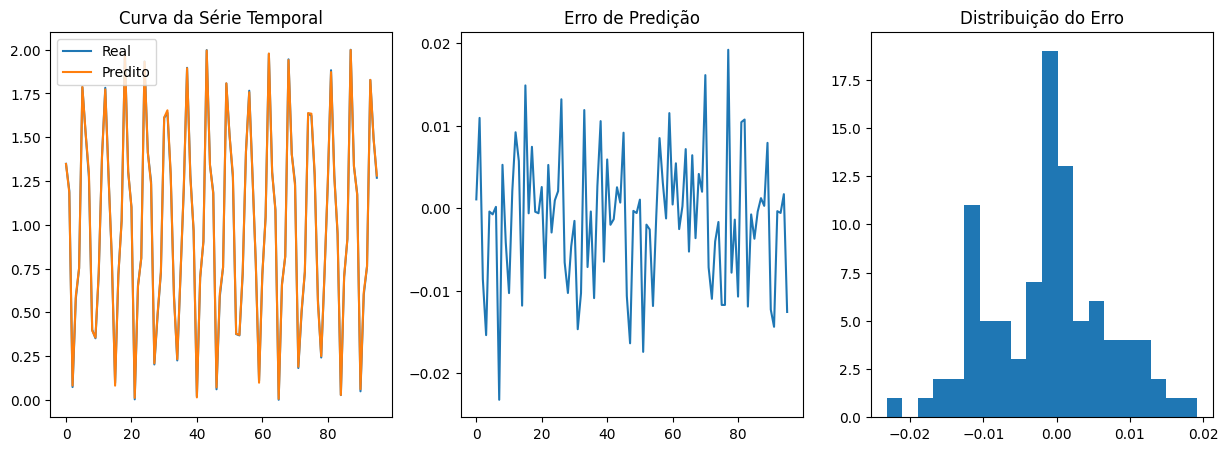

In [29]:
# Plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(test_series[input_size:], label='Real')
plt.plot(y_pred, label='Predito')
plt.legend()
plt.title("Curva da Série Temporal")

plt.subplot(1, 3, 2)
plt.plot(error)
plt.title("Erro de Predição")

plt.subplot(1, 3, 3)
plt.hist(error, bins=20)
plt.title("Distribuição do Erro")

plt.show()